#### Analyzing Neural Time Series Data
Python code for Chapter 4 script B -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

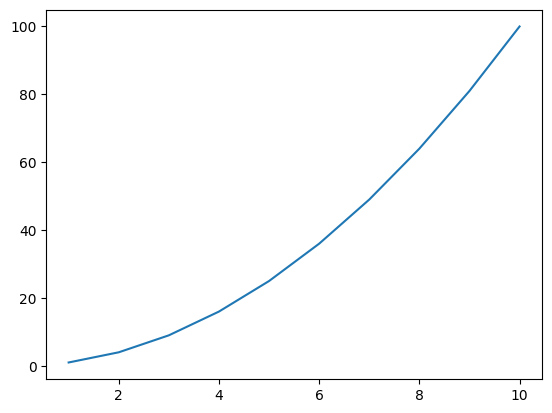

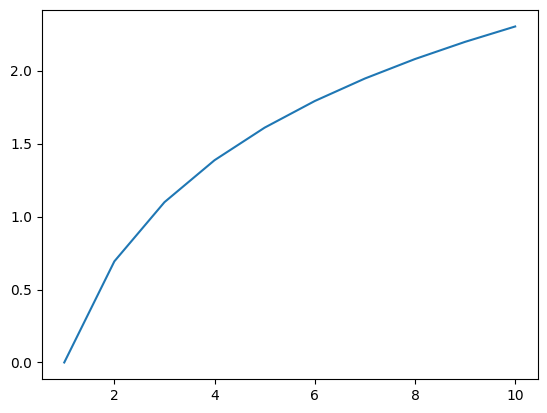

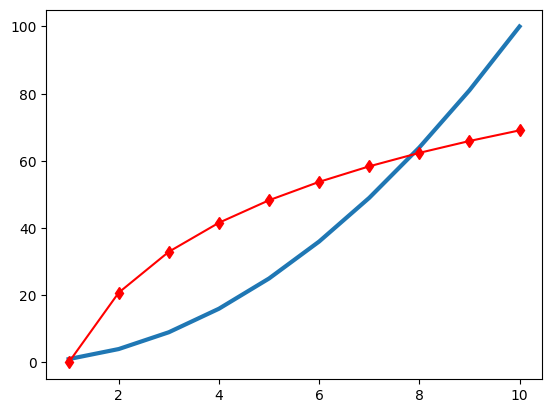

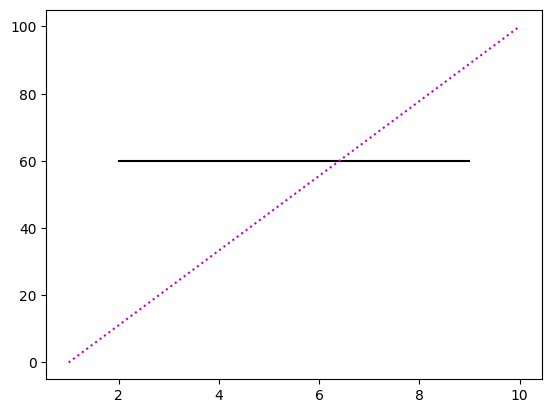

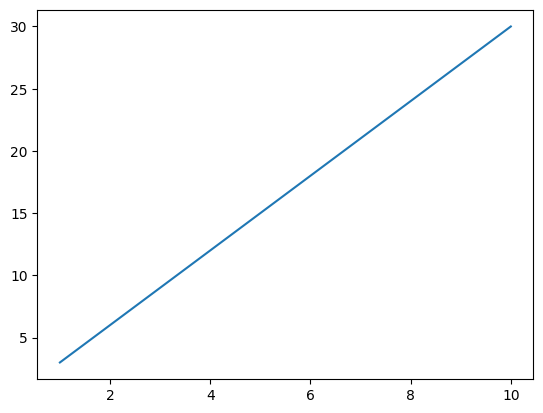

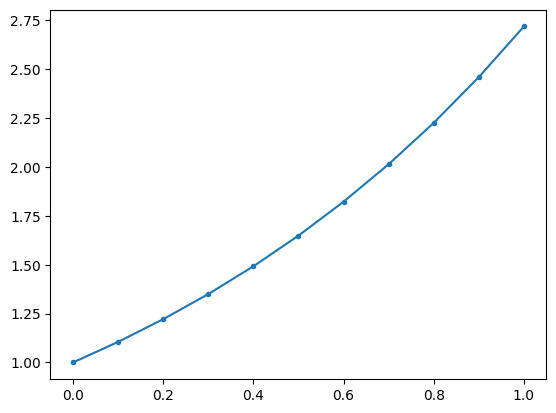

x and y must have same first dimension, but have shapes (11,) and (12,)


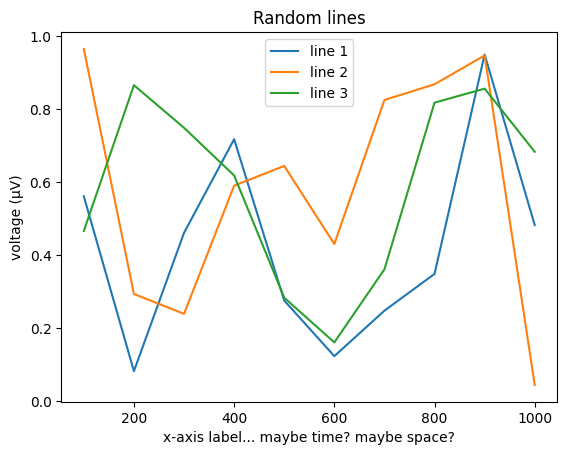

In [8]:
# Basic plotting

# Open a new figure and plot X by Y
plt.figure()
plt.plot(range(1, 11), np.power(range(1, 11), 2))
plt.show()

# Overwrite the previous plot
plt.plot(range(1, 11), np.log(range(1, 11)))
plt.show()

# Plot with additional options
plt.plot(range(1, 11), np.power(range(1, 11), 2), linewidth=3)
plt.plot(range(1, 11), np.log(range(1, 11)) * 30, 'r-d')
plt.show()

# Drawing lines
plt.plot([2, 9], [60, 60], 'k')
plt.plot([1, 10], [0, 100], 'm:')
plt.show()

# Plot something else
plt.plot(range(1, 11), np.multiply(range(1, 11), 3))
plt.show()

# Plot information in variables
x = np.arange(0, 1.1, 0.1)
y = np.exp(x)
plt.plot(x, y, '.-')
plt.show()

# x and y need to be of equal length
x = np.arange(0, 1.1, 0.1)
y = np.array([0] + list(np.exp(x)))
try:
    plt.plot(x, y, '.-')
    plt.show()
except ValueError as e:
    print(e)

# Plot multiple lines simultaneously
plt.clf()
plt.plot(range(100, 1001, 100), np.random.rand(10, 3))
plt.title('Random lines')
plt.xlabel('x-axis label... maybe time? maybe space?')
plt.ylabel('voltage (μV)')
plt.legend(['line 1', 'line 2', 'line 3'])
plt.show()

# Close a figure
plt.close()

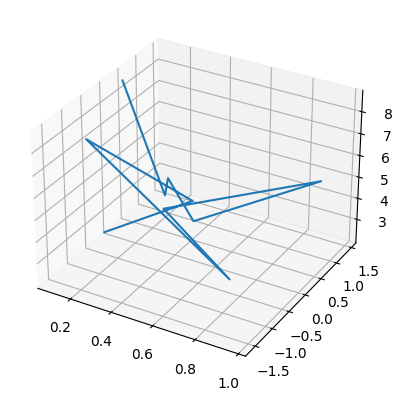

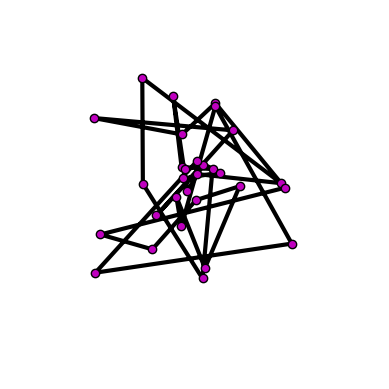

In [9]:
# Plotting lines in 3D space

# Define data in 3 dimensions
n = 10
dataX = np.random.rand(n)
dataY = np.random.randn(n)
dataZ = np.random.rand(n) * 10

# Plot a line in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(dataX, dataY, dataZ)
ax.grid(True)
plt.show()

# Adding other features to the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# Plotting a 3D matrix
data3d = np.random.randn(3, 30)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data3d[0, :], data3d[1, :], data3d[2, :], 'ko-', linewidth=3, markerfacecolor='m')
ax.axis('off')
ax.axis('square')
plt.show()

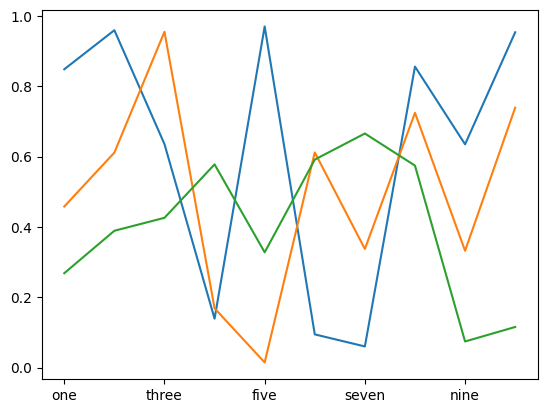

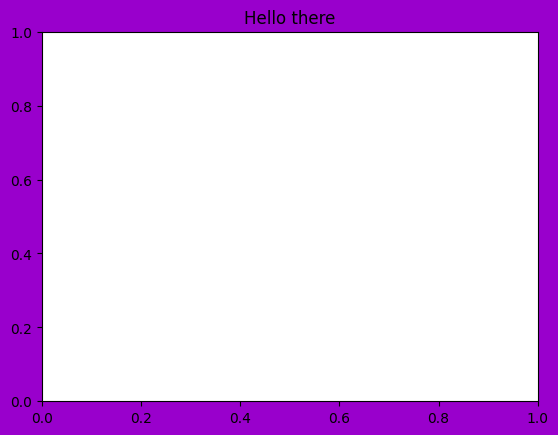

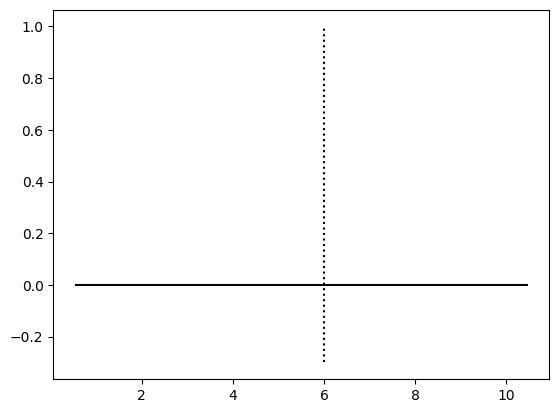

In [10]:
# Slightly more advanced: get and set

# Plot and modify axis properties
plt.plot(range(1, 11), np.random.rand(10, 3))
ax = plt.gca()
ax.set_xticks(range(1, 10, 2))
ax.set_xticklabels(['one', 'three', 'five', 'seven', 'nine'])
plt.show()

# Get axis properties
axis_ylim = ax.get_ylim()

# Assign axis properties using variables
the_ylim_i_want = [-0.3, -np.cos(np.pi)]
ax.set_ylim(the_ylim_i_want)
plt.show()

# Change properties of figures
fig = plt.gcf()
fig.patch.set_facecolor((0.6, 0, 0.8))
plt.title('Hello there')
titleh = ax.title
titleh.set_fontsize(40)
titleh.set_text('LARGE TITLE')
plt.show()

# Draw lines showing the 0 crossings
plt.plot(ax.get_xlim(), [0, 0], 'k')
plt.plot([6, 6], ax.get_ylim(), 'k:')
plt.show()

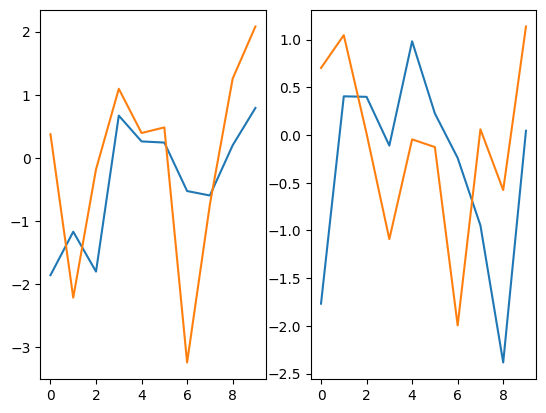

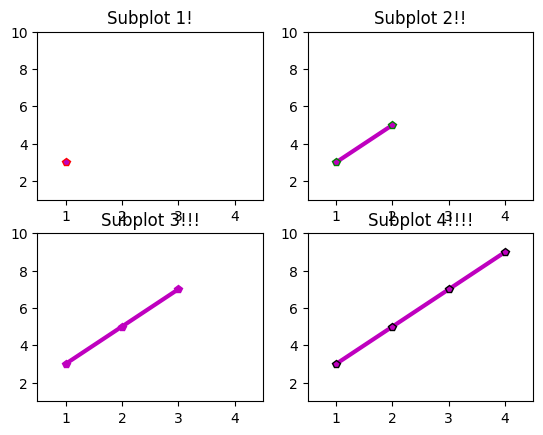

In [11]:
# Subplots

# Use multiple plots in a figure
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(np.random.randn(10, 2))
plt.subplot(1, 2, 2)
plt.plot(np.random.randn(10, 2))
plt.show()

# More subplots with different features
edgecolors = ['r', 'g', 'm', 'k']
plt.clf()
for subploti in range(1, 5):
    plt.subplot(2, 2, subploti)
    plt.plot(range(1, subploti + 1), np.multiply(range(1, subploti + 1), 2) + 1, 'm-p', linewidth=3, markeredgecolor=edgecolors[subploti - 1])
    ax = plt.gca()
    ax.set_xlim([0.5, 4.5])
    ax.set_ylim([1, 10])
    plt.title('Subplot {}{}'.format(subploti, '!' * subploti))
plt.show()

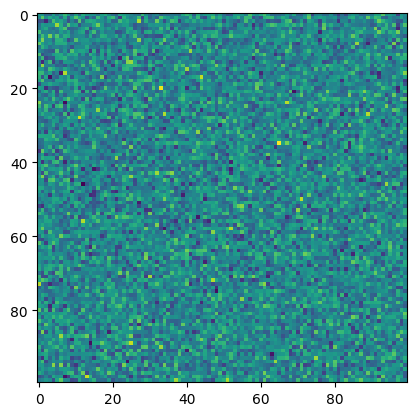

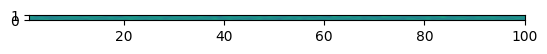

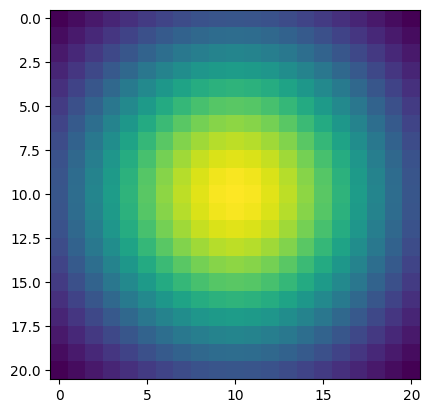

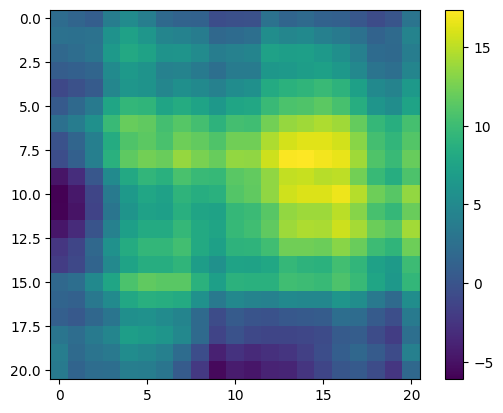

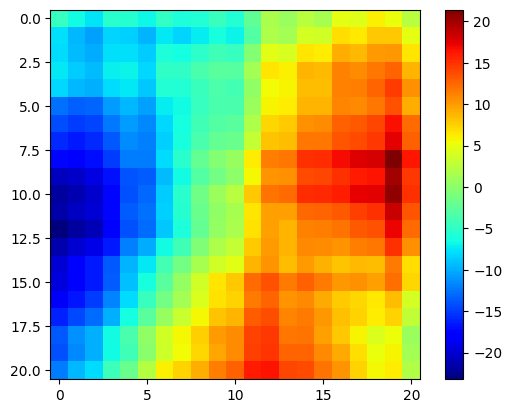

In [12]:
# Basic image plotting

# Plot images in 2D
plt.figure()
plt.imshow(np.random.randn(100, 100))
plt.show()

# Imagesc with x, y, z inputs
plt.imshow(np.random.randn(100, 100), extent=(1, 100, 0, 1))
plt.show()

# Make the plot smoother with a 2D Gaussian convolution
xyrange = np.arange(-1, 1.1, 0.1)
X, Y = np.meshgrid(xyrange, xyrange)
gaus2d = np.exp(-(X**2 + Y**2))

# Look at the Gaussian
plt.imshow(gaus2d)
plt.show()

# Convolve and plot
plt.imshow(convolve2d(gaus2d, np.random.randn(100, 100), mode='same'))
plt.colorbar()
plt.show()

# Change the colormap
plt.imshow(convolve2d(gaus2d, np.random.randn(100, 100), mode='same'))
plt.colorbar()
plt.set_cmap('jet')
plt.show()

(700, 734)


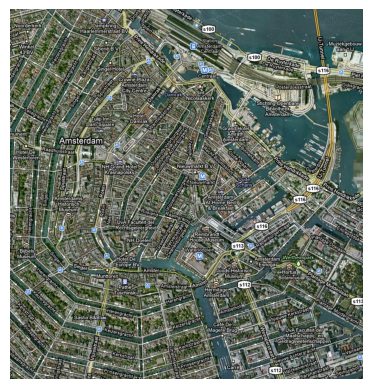

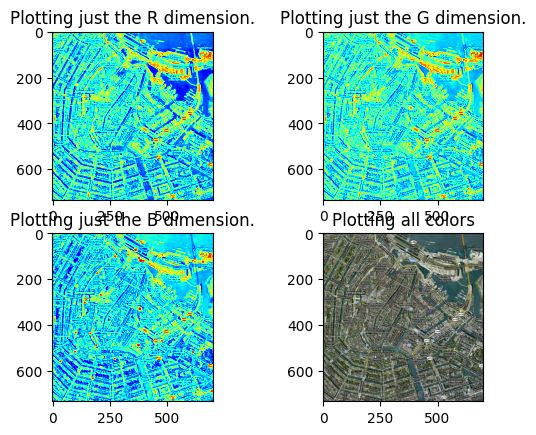

In [13]:
# A bit more about images

# Load an image
amsterdam = Image.open('../data/amsterdam.bmp')
print(amsterdam.size)

# Display the image
plt.figure()
plt.imshow(amsterdam)
plt.axis('image')
plt.axis('off')
plt.show()

# Plot the individual color components
title_color_components = 'RGB'
for subploti in range(1, 5):
    plt.subplot(2, 2, subploti)
    if subploti < 4:
        plt.imshow(np.array(amsterdam)[:, :, subploti - 1])
        plt.title('Plotting just the {} dimension.'.format(title_color_components[subploti - 1]))
    else:
        plt.imshow(amsterdam)
        plt.title('Plotting all colors')
plt.show()